In [6]:
# Introduction to Artificial Neural Networks with Keras

# First we will look at the MLP architecture
# Secondly we will see how to implement an ANN using keras API

# ANN's work better than most other methods on extremely large data sets
# They hardly ever get stuck in local optima
# Neural networks are where the money is as they sound cool to general public.

# ANN's are simple in idea but with vast data and large amounts of "neurons" we create extremely complex systems
# (just like Wolfram Physics)

# Lets try what is called perceptron learning using sckit - learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

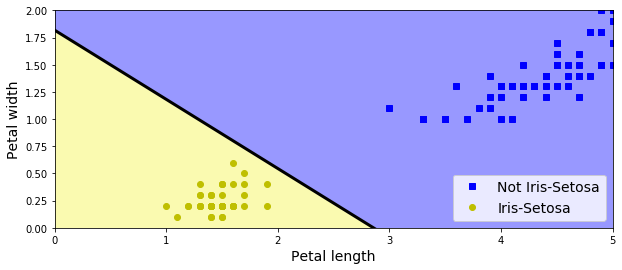

In [9]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [10]:
# The main weakness of perceptrons is that they struggle to solve simple probelms
# The solution was the creation of "hidden layers", or repeating the process of perceptrons more than once

In [11]:
# Multilayer Perceptron and Backpropagation


# A MLP is composed of one input layer. one or more layers of TLU's known as hidden layers and finally another
# TLU layer that is the output layer. (layers close to input = lower layer, close to output = upper layers)
# every layer accept the output has what is known as a bias neuron and is fully connected to the next layer
# When a ANN contains many hidden layers then this is called deep learning. (neural networks approx= deep learning)

In [12]:
# There was trouble originally training ANN's until backpropagation was purposed. It is gradient decent using
# an eficient technique for computing the gradients automatically. Once it has the grads it can perform normal 
# grad decent and repeat until we have a solution the model converges to.

In [14]:
# MNIST Classification using the estimator API

import tensorflow as tf
from tensorflow import keras

In [25]:
# in this section we will tackle the fashion MNIST whihc is a drop in replacement for MNIST. Instead of numbers,
# the images represent fashion items, each class is more diverse by significantly harder.

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

11493376/11490434 [==============================] - 4s 0us/step


In [26]:
class_names = ["Top", "Trousers", "Pullover", "Dress", "Coat", "Sandals", "Shirt", "Trainers", "Bag", "Boots"]

In [28]:
class_names[y_train[0]]

'Trainers'